# data mining<span style="color: orange"> INEGI-PROJECT</span>
# Javier Can
- <span style = "color :orange">  KDD process for INEGI data </span>

For this project, I utilized a dataset provided by INEGI to explore associations between a target variable and to construct a linear regression model with a high degree of precision. This entailed a thorough analysis of the independent variables that relate to the target variable, accompanied by a comprehensive data preprocessing stage.

## load data and libraries

In [112]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import probplot
# load libraries before using any function
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pylab 
import scipy.stats as stats

In [113]:
#LOAD DATA 
df = pd.read_csv('CDMXds.csv', index_col=0)
#DATAFRAME HEAD
df.head()

,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,Ciudad de México,0,Total de la entidad Ciudad de México,0,Total de la Entidad,NaN,NaN,NaN,9209944,4805017,...,2536523,2084156,1290811,957162,568827,46172,77272,561128,10528,*
9,Ciudad de México,0,Total de la entidad Ciudad de México,9998,Localidades de una vivienda,NaN,NaN,NaN,320,128,...,67,23,17,8,8,9,14,52,5,*
9,Ciudad de México,0,Total de la entidad Ciudad de México,9999,Localidades de dos viviendas,NaN,NaN,NaN,364,178,...,89,27,22,6,4,10,15,72,3,*
9,Ciudad de México,2,Azcapotzalco,0,Total del Municipio,NaN,NaN,NaN,432205,227255,...,123961,105899,66399,50965,31801,1661,2869,22687,322,*
9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,"99°11'03.698"" W","19°29'02.770"" N",2244.0,432205,227255,...,123961,105899,66399,50965,31801,1661,2869,22687,322,12


In [114]:
df.tail(100)

,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,Ciudad de México,13,Xochimilco,163,Tecacalango,"99°06'25.550"" W","19°13'04.335"" N",2424.0,207,106,...,47,24,8,7,8,0,1,21,0,1
9,Ciudad de México,13,Xochimilco,164,Tzompole,"99°07'03.750"" W","19°12'14.585"" N",2588.0,39,19,...,10,2,1,2,2,0,0,7,0,1
9,Ciudad de México,13,Xochimilco,165,Cacalco (Tepextenco),"99°07'29.025"" W","19°11'40.128"" N",2635.0,18,8,...,4,1,1,0,0,0,0,3,0,1
9,Ciudad de México,13,Xochimilco,168,Texalco (Joyas de Texalco),"99°06'01.305"" W","19°12'24.097"" N",2563.0,3,*,...,*,*,*,*,*,*,*,*,*,1
9,Ciudad de México,13,Xochimilco,169,Apatlaco,"99°05'11.613"" W","19°15'52.819"" N",2230.0,95,47,...,23,4,5,1,4,1,2,20,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,Ciudad de México,15,Cuauhtémoc,1,Cuauhtémoc,"99°09'06.781"" W","19°26'29.928"" N",2230.0,545884,284933,...,183557,157682,98006,87040,45215,4197,4123,31274,632,13
9,Ciudad de México,16,Miguel Hidalgo,0,Total del Municipio,NaN,NaN,NaN,414470,219003,...,137103,124777,88559,77955,39658,2459,2398,15787,419,*
9,Ciudad de México,16,Miguel Hidalgo,1,Miguel Hidalgo,"99°11'26.716"" W","19°24'26.168"" N",2264.0,414470,219003,...,137103,124777,88559,77955,39658,2459,2398,15787,419,12


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 666 entries, 9 to 9
Columns: 285 entries, NOM_ENT to TAMLOC
dtypes: float64(1), int64(5), object(279)
memory usage: 1.5+ MB


In [116]:
len(df)

666

In [117]:
df.isnull().sum()

NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
NOM_LOC        0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 285, dtype: int64

In [118]:
df.isna().sum()

NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
NOM_LOC        0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 285, dtype: int64

In [119]:
df.shape

(666, 285)

# preprocessing
- data cleaning


In [120]:
df.describe()

,MUN,LOC,ALTITUD,POBTOT,VIVTOT,TVIVHAB
count,666.000000,666.000000,634.000000,6.660000e+02,6.660000e+02,6.660000e+02
mean,10.345345,438.905405,2647.287066,4.148829e+04,1.367776e+04,1.242145e+04
std,2.412552,1457.003671,290.512740,3.862493e+05,1.266986e+05,1.152315e+05
min,0.000000,0.000000,2217.000000,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.000000,128.250000,2413.250000,1.200000e+01,5.000000e+00,3.000000e+00
50%,11.000000,220.500000,2616.500000,4.950000e+01,1.800000e+01,1.300000e+01
75%,12.000000,321.750000,2842.000000,1.660000e+02,5.175000e+01,4.275000e+01
max,17.000000,9999.000000,3456.000000,9.209944e+06,3.036239e+06,2.757433e+06


Upon analyzing this information from the .describe function, it is evident that the basic statistical measures either lack significant correlation or are considerably dispersed, taking into consideration the mean and standard deviation.

In [121]:
#drop the NaN values and  the "*" values

df = df[df != '*'] 
df = df.dropna() 

df.head()


,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,"99°11'03.698"" W","19°29'02.770"" N",2244.0,432205,227255,...,123961,105899,66399,50965,31801,1661,2869,22687,322,12
9,Ciudad de México,3,Coyoacán,1,Coyoacán,"99°09'43.724"" W","19°21'00.770"" N",2247.0,614447,325337,...,179280,157908,101660,80413,44991,2893,3506,27008,443,13
9,Ciudad de México,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,"99°17'59.252"" W","19°21'26.461"" N",2780.0,186693,97615,...,49357,41641,29116,23240,13476,709,1263,9229,126,11
9,Ciudad de México,4,Cuajimalpa de Morelos,10,Cruz Blanca,"99°19'26.437"" W","19°19'04.026"" N",2982.0,728,362,...,181,86,36,34,32,4,7,94,2,3
9,Ciudad de México,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,"99°19'32.454"" W","19°19'51.617"" N",2936.0,26042,13416,...,6040,4188,2245,1390,949,170,315,2092,44,8


In [122]:
df.shape

(494, 285)

In [123]:
#chech if there are any NaN values
df.isnull().sum()



NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
NOM_LOC        0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 285, dtype: int64

In [124]:
df.tail()

,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,Ciudad de México,13,Xochimilco,295,San Sebastián,"99°02'22.301"" W","19°15'57.916"" N",2230.0,27,14,...,8,0,1,0,1,0,0,7,0,1
9,Ciudad de México,14,Benito Juárez,1,Benito Juárez,"99°09'28.272"" W","19°22'19.172"" N",2238.0,434153,232032,...,170360,161786,122608,112039,54473,2434,1141,10638,191,12
9,Ciudad de México,15,Cuauhtémoc,1,Cuauhtémoc,"99°09'06.781"" W","19°26'29.928"" N",2230.0,545884,284933,...,183557,157682,98006,87040,45215,4197,4123,31274,632,13
9,Ciudad de México,16,Miguel Hidalgo,1,Miguel Hidalgo,"99°11'26.716"" W","19°24'26.168"" N",2264.0,414470,219003,...,137103,124777,88559,77955,39658,2459,2398,15787,419,12
9,Ciudad de México,17,Venustiano Carranza,1,Venustiano Carranza,"99°06'49.324"" W","19°25'09.343"" N",2230.0,443704,233586,...,124244,102008,62293,44934,28376,1895,3850,27580,414,12


In [125]:
#check the missing values

df.isnull().sum()

NOM_ENT        0
MUN            0
NOM_MUN        0
LOC            0
NOM_LOC        0
              ..
VPH_SINRTV     0
VPH_SINLTC     0
VPH_SINCINT    0
VPH_SINTIC     0
TAMLOC         0
Length: 285, dtype: int64

In [126]:

#chech the data types

df.dtypes


NOM_ENT        object
MUN             int64
NOM_MUN        object
LOC             int64
NOM_LOC        object
                ...  
VPH_SINRTV     object
VPH_SINLTC     object
VPH_SINCINT    object
VPH_SINTIC     object
TAMLOC         object
Length: 285, dtype: object

In [127]:
df.head()

,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,Ciudad de México,2,Azcapotzalco,1,Azcapotzalco,"99°11'03.698"" W","19°29'02.770"" N",2244.0,432205,227255,...,123961,105899,66399,50965,31801,1661,2869,22687,322,12
9,Ciudad de México,3,Coyoacán,1,Coyoacán,"99°09'43.724"" W","19°21'00.770"" N",2247.0,614447,325337,...,179280,157908,101660,80413,44991,2893,3506,27008,443,13
9,Ciudad de México,4,Cuajimalpa de Morelos,1,Cuajimalpa de Morelos,"99°17'59.252"" W","19°21'26.461"" N",2780.0,186693,97615,...,49357,41641,29116,23240,13476,709,1263,9229,126,11
9,Ciudad de México,4,Cuajimalpa de Morelos,10,Cruz Blanca,"99°19'26.437"" W","19°19'04.026"" N",2982.0,728,362,...,181,86,36,34,32,4,7,94,2,3
9,Ciudad de México,4,Cuajimalpa de Morelos,20,San Lorenzo Acopilco,"99°19'32.454"" W","19°19'51.617"" N",2936.0,26042,13416,...,6040,4188,2245,1390,949,170,315,2092,44,8


In [128]:
#convert the data types

text_columns = df.select_dtypes(include=['object']).columns
for column in text_columns:
    df[column] = df[column].astype('category').cat.codes #convert to categorical data to numerical data
    
    
df.dtypes   

NOM_ENT         int8
MUN            int64
NOM_MUN         int8
LOC            int64
NOM_LOC        int16
               ...  
VPH_SINRTV      int8
VPH_SINLTC      int8
VPH_SINCINT     int8
VPH_SINTIC      int8
TAMLOC          int8
Length: 285, dtype: object

In [129]:
len(df)

494

In [130]:
df.head()

,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,
9,0,2,0,1,35,410,493,2244.0,432205,75,...,17,6,62,41,28,13,29,45,15,2
9,0,3,2,1,82,383,479,2247.0,614447,105,...,35,19,3,54,38,28,37,52,22,3
9,0,4,3,1,92,479,481,2780.0,186693,197,...,91,61,35,28,11,43,9,115,3,1
9,0,4,3,10,86,486,465,2982.0,728,112,...,37,95,43,32,29,33,55,117,8,6
9,0,4,3,20,304,488,472,2936.0,26042,25,...,102,62,27,12,55,15,34,39,21,11


In [131]:
#save the data frame in a csv file
df.to_csv('cgpv2000_iter_31_clean_(c).csv')





# data selection


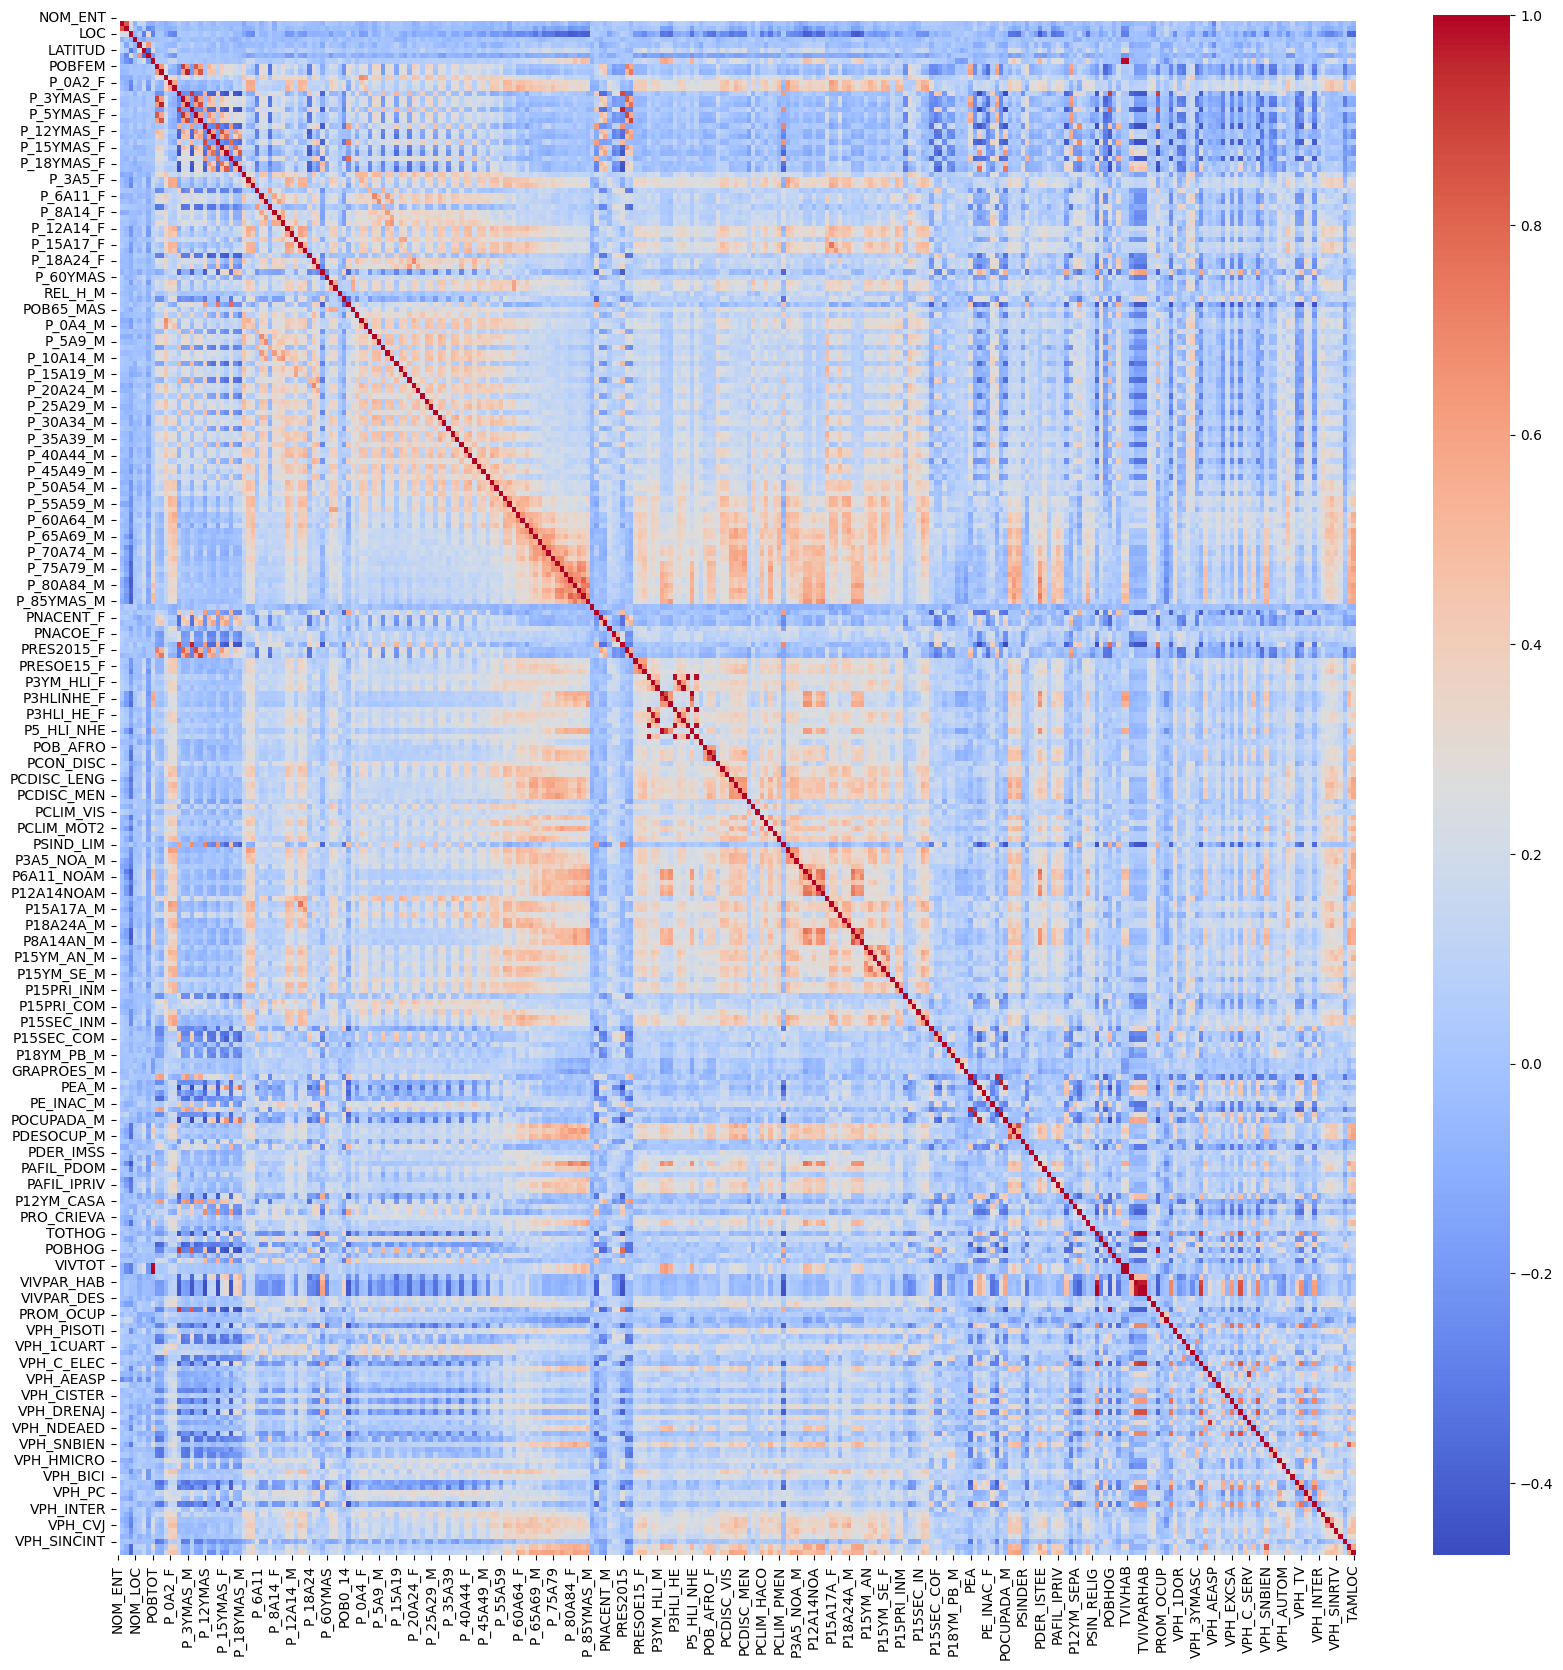

In [132]:
#do a correlation matrix

corr = df.corr()

corr

#plot the correlation matrix

plt.figure(figsize=(20,20))

sns.heatmap(corr, annot=False, cmap='coolwarm')

plt.show()



selected target : 'psindisc'


Upon observation, it becomes apparent that the target variable exhibits varying degrees of correlation. As a result, we can eliminate those with a lighter shade of blue and select the ones with a more intense color. By leveraging the target variable, we can arrange them in descending order of correlation, from the highest to the lowest.

In [149]:
#verifiy the correlation between the variables and the target

correlation_with_target = df.corr()['PRES2015_F']
sorted_correlation = correlation_with_target.sort_values(ascending=False)

sorted_correlation

PRES2015_F    1.000000
P_5YMAS_F     0.875468
P_3YMAS_F     0.804757
POBFEM        0.719565
P_12YMAS_F    0.712269
                ...   
P_18A24      -0.333264
POBHOG       -0.341124
OCUPVIVPAR   -0.341124
VPH_NDACMM   -0.352690
NOM_ENT            NaN
Name: PRES2015_F, Length: 285, dtype: float64

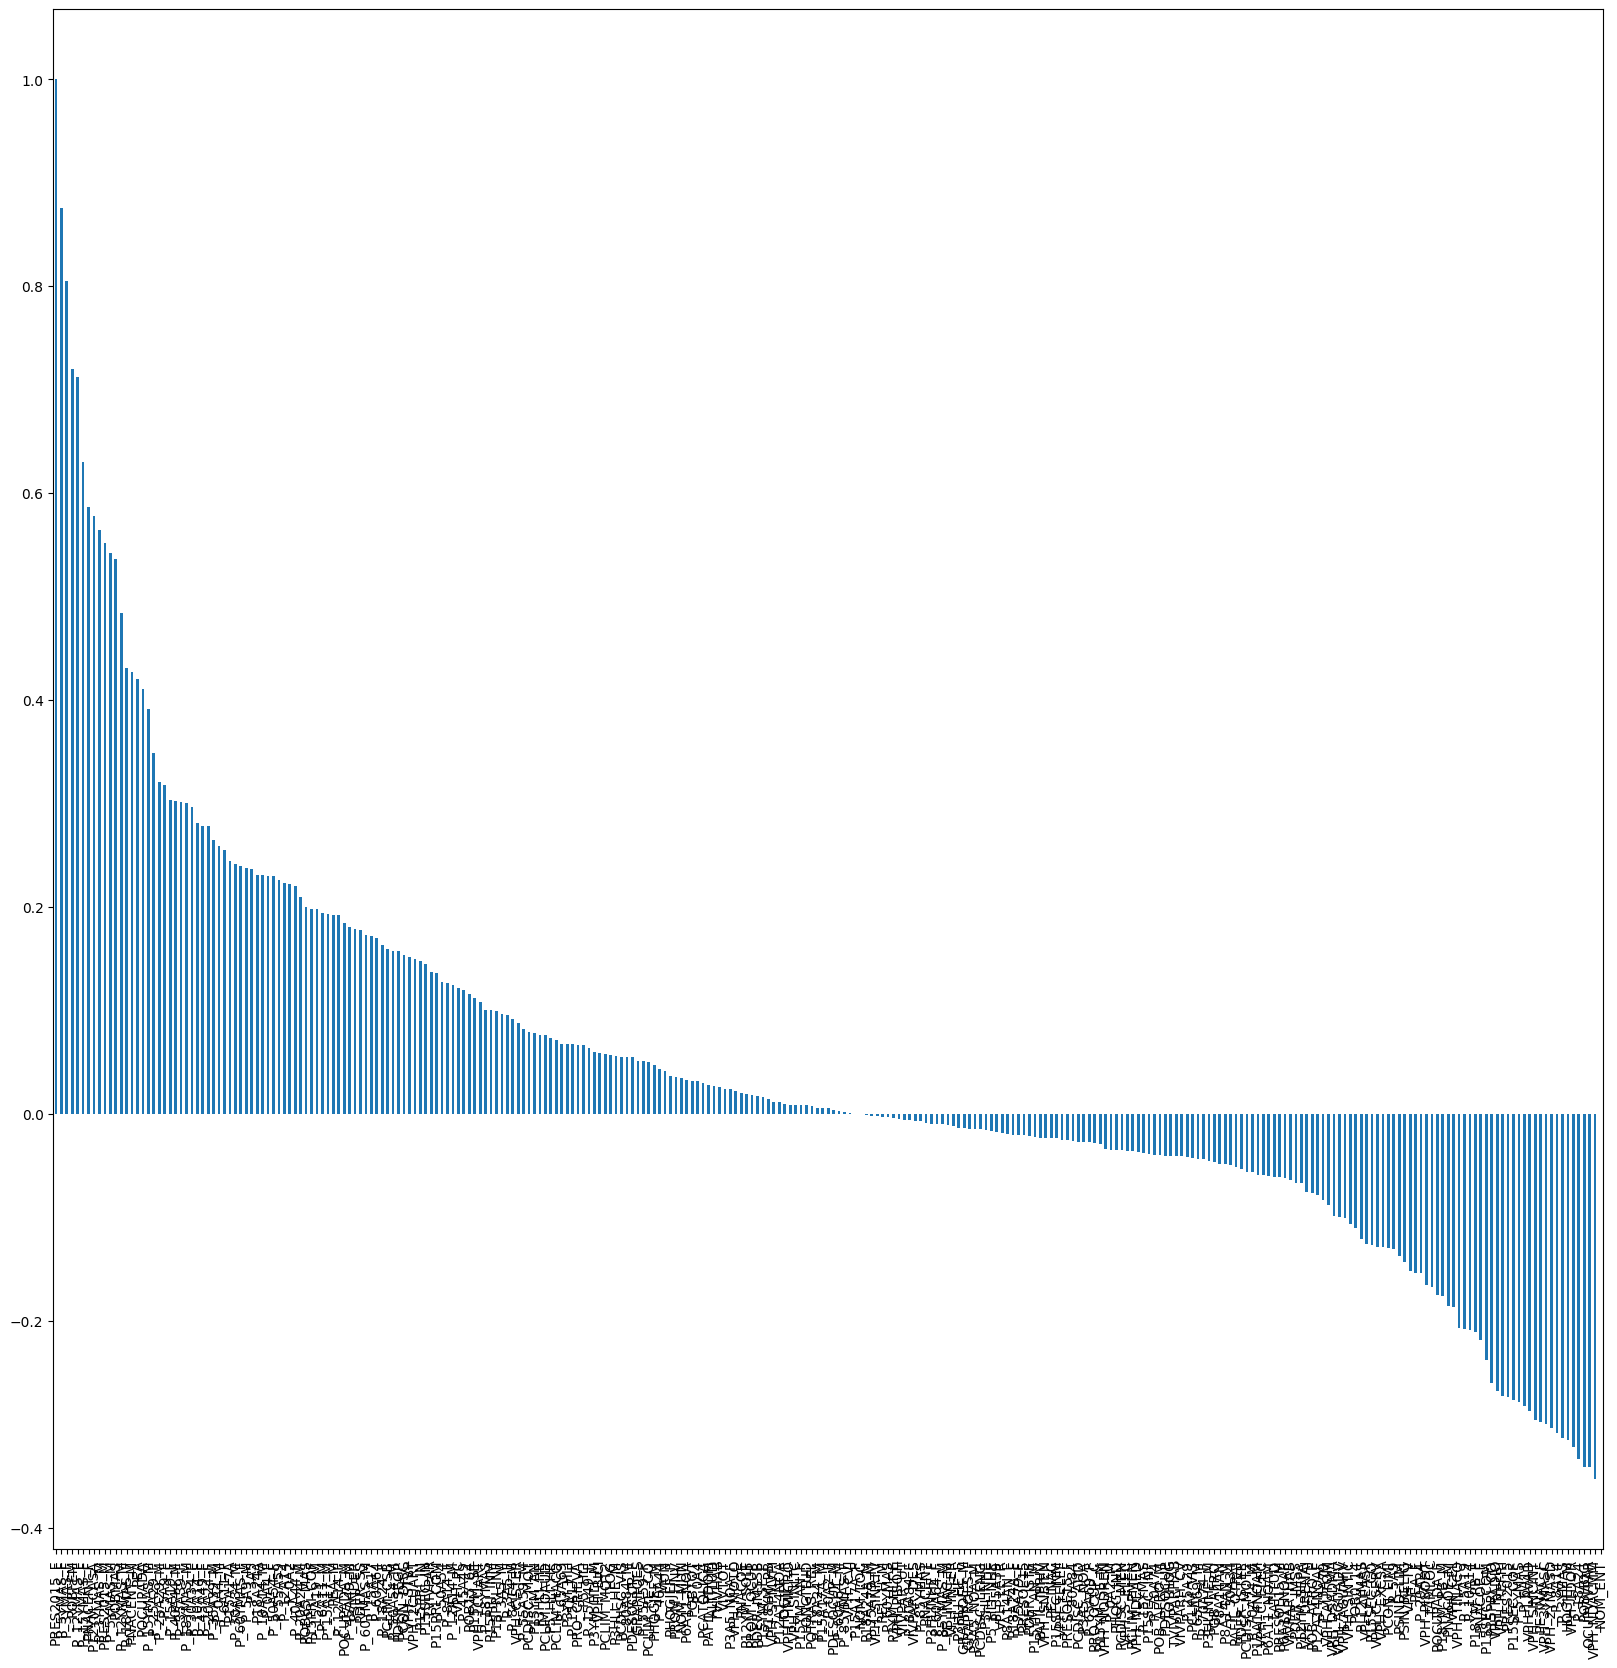

In [150]:
##show the columns with the correlation with the target variable in a bar plot

plt.figure(figsize=(20,20))

sorted_correlation.plot(kind='bar')

plt.show()



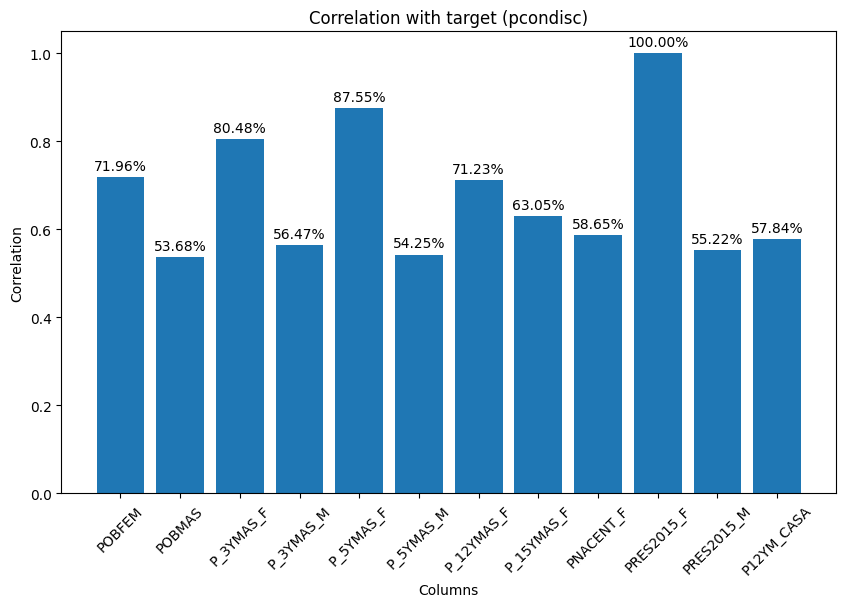

In [151]:
#select the columns with a correlation greater than 0.5


selected_columns = correlation_with_target[correlation_with_target >= 0.5].index

plt.figure(figsize=(10, 6))
ax = plt.bar(selected_columns, correlation_with_target[selected_columns])


for bar in ax:
    height = bar.get_height()
    plt.annotate(f'{height:.2%}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # Distancia del texto a la barra
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.title('Correlation with target (pcondisc)')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()




the most columns that have a high correlation with the target 

In [152]:
#do a data frame with the selected columns

df_selected = df[selected_columns]

df_selected.columns

Index(['POBFEM', 'POBMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS_F', 'P_5YMAS_M',
       'P_12YMAS_F', 'P_15YMAS_F', 'PNACENT_F', 'PRES2015_F', 'PRES2015_M',
       'P12YM_CASA'],
      dtype='object')

In [137]:
df_selected.head()

,P_55A59_F,PCDISC_MOT,PCDISC_VIS
ENTIDAD,,,
9,12,7,61
9,24,20,14
9,42,31,33
9,9,24,19
9,46,41,44


In [138]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 494 entries, 9 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   P_55A59_F   494 non-null    int8 
 1   PCDISC_MOT  494 non-null    int8 
 2   PCDISC_VIS  494 non-null    int8 
dtypes: int8(3)
memory usage: 5.3 KB


In [153]:
df_selected.shape

(494, 12)

In [154]:
df_selected.describe()

,POBFEM,POBMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS_F,P_5YMAS_M,P_12YMAS_F,P_15YMAS_F,PNACENT_F,PRES2015_F,PRES2015_M,P12YM_CASA
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,96.087045,94.880567,99.801619,98.384615,96.461538,99.358300,89.929150,84.813765,85.698381,90.224696,97.546559,93.659919
std,57.559939,56.221129,57.053026,56.667331,55.961171,56.944469,51.231458,49.144050,49.052112,53.593165,53.303609,52.186957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,48.000000,52.000000,51.000000,51.000000,53.000000,45.000000,40.250000,43.250000,44.000000,56.000000,49.000000
50%,99.000000,97.000000,104.000000,102.500000,98.000000,102.000000,91.000000,87.000000,88.000000,93.500000,99.000000,93.000000
75%,142.750000,140.750000,147.000000,145.000000,141.000000,149.000000,132.000000,125.000000,127.000000,136.000000,145.750000,139.000000
max,199.000000,195.000000,198.000000,197.000000,197.000000,198.000000,179.000000,171.000000,167.000000,182.000000,187.000000,184.000000


we can observe the describe  of the new data frame is correct due to the mean and std are close between them

array([[<Axes: xlabel='POBFEM', ylabel='POBFEM'>,
        <Axes: xlabel='POBMAS', ylabel='POBFEM'>,
        <Axes: xlabel='P_3YMAS_F', ylabel='POBFEM'>,
        <Axes: xlabel='P_3YMAS_M', ylabel='POBFEM'>,
        <Axes: xlabel='P_5YMAS_F', ylabel='POBFEM'>,
        <Axes: xlabel='P_5YMAS_M', ylabel='POBFEM'>,
        <Axes: xlabel='P_12YMAS_F', ylabel='POBFEM'>,
        <Axes: xlabel='P_15YMAS_F', ylabel='POBFEM'>,
        <Axes: xlabel='PNACENT_F', ylabel='POBFEM'>,
        <Axes: xlabel='PRES2015_F', ylabel='POBFEM'>,
        <Axes: xlabel='PRES2015_M', ylabel='POBFEM'>,
        <Axes: xlabel='P12YM_CASA', ylabel='POBFEM'>],
       [<Axes: xlabel='POBFEM', ylabel='POBMAS'>,
        <Axes: xlabel='POBMAS', ylabel='POBMAS'>,
        <Axes: xlabel='P_3YMAS_F', ylabel='POBMAS'>,
        <Axes: xlabel='P_3YMAS_M', ylabel='POBMAS'>,
        <Axes: xlabel='P_5YMAS_F', ylabel='POBMAS'>,
        <Axes: xlabel='P_5YMAS_M', ylabel='POBMAS'>,
        <Axes: xlabel='P_12YMAS_F', ylabel='POBMAS'>

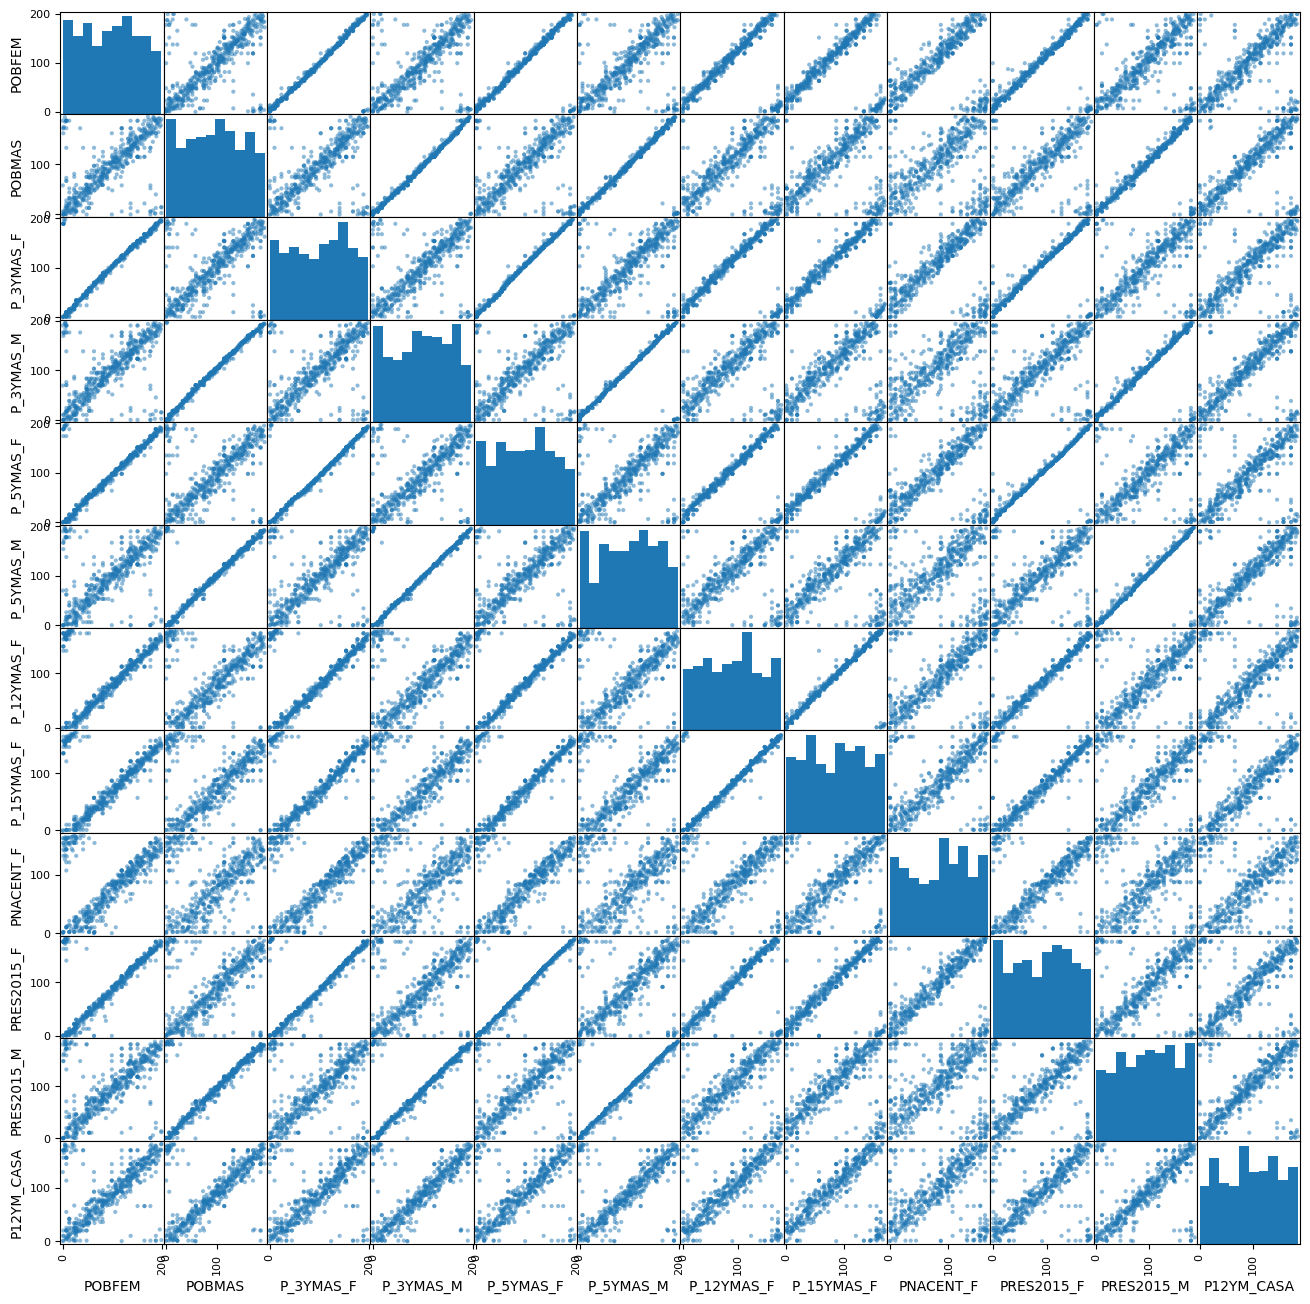

In [155]:
# draw a matrix of scatter plots of the data set in a shape of 16" width x 16" height
# to roughly determine if there is a linear correlation between multiple variables

pd.plotting.scatter_matrix(df_selected, figsize=(16,16))

in this scatter matrix we can observe the correlation between the variables

<Axes: >

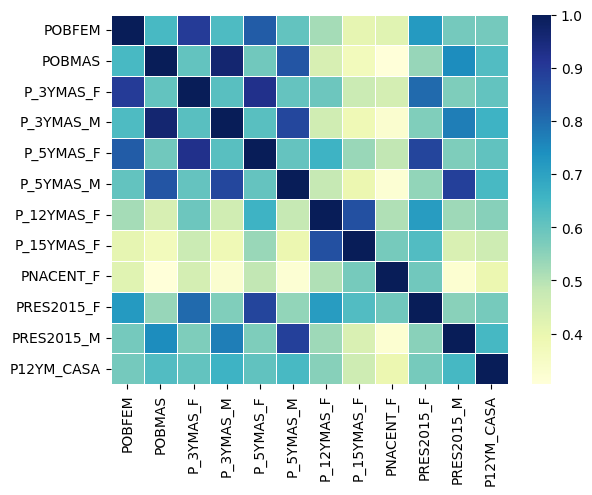

In [156]:
# Correlation and Heatmap
import seaborn as sns 
matrix = df_selected.corr()
sns.heatmap(matrix,linewidths=.5, cmap="YlGnBu")

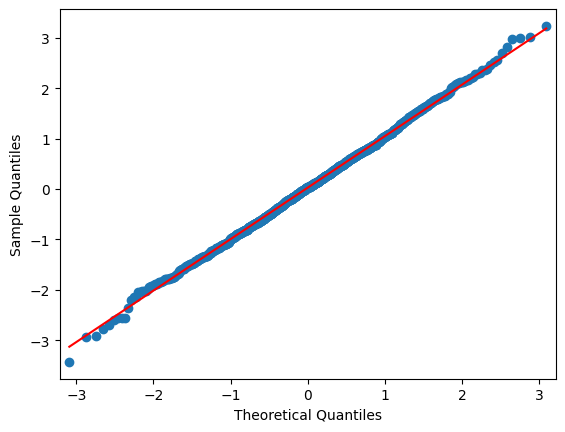

In [157]:
# include the QQ norm to see if residuals are normal
residuals = np.random.normal(0,1, 1000)
# using 's' to get scaled line by the standard deviation and mean added) 
sm.qqplot(residuals, line='s')
pylab.show()


The Q-Q plot is useful for checking if the residuals of a model fit well to a normal distribution. If the points on the plot approximately fit the reference line (the diagonal line in this case), it suggests that the residuals follow a normal distribution.

In [158]:
#normalize the data 

scaler = MinMaxScaler()

df_selected_norm = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

df_selected_norm.head()



,POBFEM,POBMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS_F,P_5YMAS_M,P_12YMAS_F,P_15YMAS_F,PNACENT_F,PRES2015_F,PRES2015_M,P12YM_CASA
0,0.376884,0.333333,0.398990,0.345178,0.370558,0.333333,0.340782,0.304094,0.311377,0.346154,0.326203,0.277174
1,0.527638,0.482051,0.545455,0.502538,0.517766,0.489899,0.497207,0.479532,0.461078,0.494505,0.486631,0.440217
2,0.989950,0.953846,0.984848,0.939086,0.969543,0.924242,0.932961,0.912281,0.910180,0.928571,0.909091,0.923913
3,0.562814,0.564103,0.565657,0.563452,0.538071,0.545455,0.486034,0.456140,0.437126,0.489011,0.545455,0.516304
4,0.125628,0.102564,0.116162,0.096447,0.101523,0.070707,0.044693,0.023392,0.095808,0.082418,0.080214,0.081522


In [159]:
#verify if the normalization was done correctly

df_selected_norm.describe()




,POBFEM,POBMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS_F,P_5YMAS_M,P_12YMAS_F,P_15YMAS_F,PNACENT_F,PRES2015_F,PRES2015_M,P12YM_CASA
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.482849,0.486567,0.504049,0.499414,0.489652,0.501810,0.502397,0.495987,0.513164,0.495740,0.521639,0.509021
std,0.289246,0.288313,0.288147,0.287651,0.284067,0.287598,0.286209,0.287392,0.293725,0.294468,0.285046,0.283625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.241206,0.246154,0.262626,0.258883,0.258883,0.267677,0.251397,0.235380,0.258982,0.241758,0.299465,0.266304
50%,0.497487,0.497436,0.525253,0.520305,0.497462,0.515152,0.508380,0.508772,0.526946,0.513736,0.529412,0.505435
75%,0.717337,0.721795,0.742424,0.736041,0.715736,0.752525,0.737430,0.730994,0.760479,0.747253,0.779412,0.755435
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is evident that even with the data normalized, the measures of central tendency appear to be very close to each other.

## lineal regression prediction and evaluation

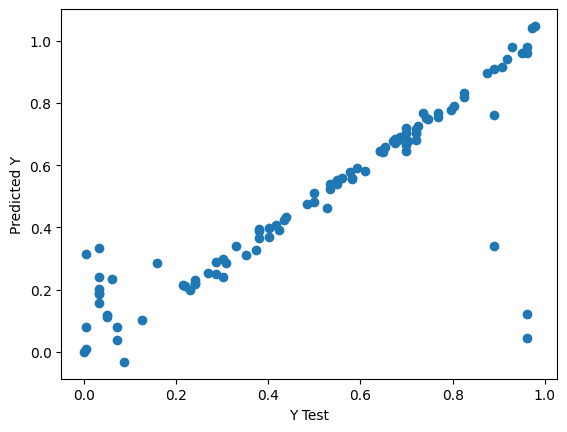

In [160]:
#do a model with the selected columns

X = df_selected_norm.drop('PRES2015_F', axis=1) #drop the target variable

y = df_selected_norm['PRES2015_F'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


#do a linear regression model

lm = LinearRegression()

lm.fit(X_train, y_train)

#do a prediction

predictions = lm.predict(X_test)

#plot the predictions

plt.scatter(y_test, predictions)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

plt.show()



MAE: 0.05938624730695501
MSE: 0.023255987669642597
RMSE: 0.15249913989804204
R2: 0.7323621794277337


C:\Users\jnoh5\AppData\Local\Temp\ipykernel_3140\973412279.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins=50)


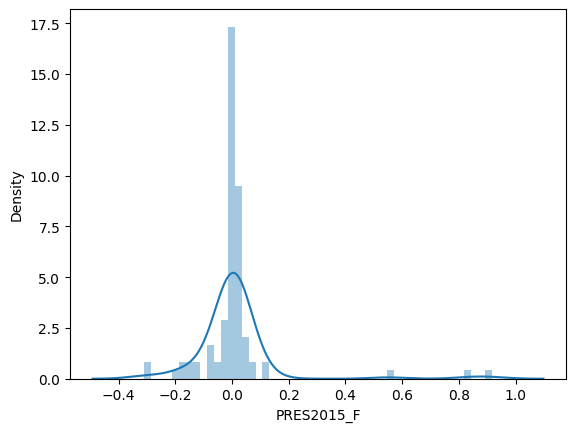

In [161]:
#do the error analysis and score the model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('R2:', metrics.r2_score(y_test, predictions))



#do a histogram of the residuals

sns.distplot((y_test - predictions), bins=50)

plt.show()

<font size="4">

- **<font color='green'>MAE:</font>** 0.031130013061817303
- **<font color='green'>MSE:</font>** 0.005673089148685557
- **<font color='green'>RMSE:</font>** 0.07531991203317724
- **<font color='green'>R2:</font>** 0.933882765039831

</font>


## Assessing Normality in Residuals

In the analysis of statistical and regression models, it's crucial to verify if the residuals follow a normal distribution. The normality of residuals is a fundamental assumption in many statistical techniques. To assess whether this assumption is met, we examine a probability density plot of the residuals.

### Key points to check for normality:

1. **Shape of the Curve**: The shape of the curve in the plot is pivotal. A symmetric, bell-shaped curve suggests that residuals follow a normal distribution. If the curve is skewed or has multiple peaks, it may indicate non-normality.

2. **Peaks and Valleys**: We observe the presence of peaks and valleys in the density curve. Peaks indicate areas of high residual density, while valleys denote areas of lower density.

3. **Width of the Curve**: The width of the curve at its broadest point provides insight into residual variability. A wider curve implies greater variability.

4. **Area under the Curve**: The total area under the curve is equal to 1, representing the total probability. We can use this area to calculate the probability of residuals falling within a specific range.

5. **Outliers**: We check for the presence of outliers in the plot. Outliers are values significantly distant from the highest density region of the distribution and may indicate model issues or unusual data.

If, upon examining the probability density plot of residuals, the above points are met and resemble a normal distribution, we can conclude that the assumption of normality is satisfied. If not, any deviations from normality should be investigated and taken into account in the model analysis.
